In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from wordcloud import WordCloud

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import os


In [ ]:
 text = pd.read_csv('/content/drive/MyDrive/amazon_rev.csv')

In [ ]:
text.head()

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8G,delmartian\n,1,1,5,1303862400,Good Quality Dog Food\n,I have bought several of the Vitality canned d...
1,1,B00813GRG4,A1D87F6ZCVE5N,dll pa\n,0,0,1,1346976000,Not as Advertised\n,Product arrived labeled as Jumbo Salted Peanut...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""\n",1,1,4,1219017600,"""Delight"" says it all\n",This is a confection that has been around a fe...
3,3,B000UA0QIQ,A395BORC6FGVX,Karl\n,3,3,2,1307923200,Cough Medicine\n,If you are looking for the secret ingredient i...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1,"Michael D. Bigham ""M. Wassir""\n",0,0,5,1350777600,Great taffy\n,Great taffy at a great price. There was a wid...


In [ ]:
text.shape

(568454, 10)

In [ ]:
text.describe()

,ID,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.000000,568454.000000,5.684540e+05
mean,284226.500000,1.065845,1.302443,4.183199,1.296257e+09
std,164098.679298,1.684817,1.867300,1.310436,4.804331e+07
min,0.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142113.250000,0.000000,0.000000,4.000000,1.271290e+09
50%,284226.500000,0.000000,1.000000,5.000000,1.311120e+09
75%,426339.750000,1.000000,2.000000,5.000000,1.332720e+09
max,568453.000000,9.000000,9.000000,5.000000,1.351210e+09


In [ ]:
text['ProfileName'] = text['ProfileName'].str.strip()
text['ReviewSummary'] = text['ReviewSummary'].str.strip()
text['ReviewText'] = text['ReviewText'].str.strip()

In [ ]:
text

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8G,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,B00813GRG4,A1D87F6ZCVE5N,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,B000UA0QIQ,A395BORC6FGVX,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,B006K2ZZ7K,A1UQRSCLF8GW1,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568449,B001EO7N10,A28KG5XORO54A,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568450,B003S1WTCU,A3I8AFVPEE8KI,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568451,B004I613EE,A121AA1GQV751,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
text=text.drop_duplicates(subset={"UserId","ProfileName","Time","ReviewText"}, keep='first', inplace=False)
text.shape

(393933, 10)

In [ ]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393933 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ID                      393933 non-null  int64 
 1   ProductId               393933 non-null  object
 2   UserId                  393933 non-null  object
 3   ProfileName             393933 non-null  object
 4   HelpfulnessNumerator    393933 non-null  int64 
 5   HelpfulnessDenominator  393933 non-null  int64 
 6   Score                   393933 non-null  int64 
 7   Time                    393933 non-null  int64 
 8   ReviewSummary           393933 non-null  object
 9   ReviewText              393933 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.1+ MB


In [ ]:
text.isnull().sum()

ID                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [ ]:
text['Helpfulness']=text["HelpfulnessNumerator"].div(text["HelpfulnessDenominator"].values)

In [ ]:
nlmean = text["Helpfulness"].median() 
text['Helpfulness'].fillna(nlmean,inplace = True)

#EXPLORATORY DATA ANALYSIS

## DISTRIBUTION OF RATINGS

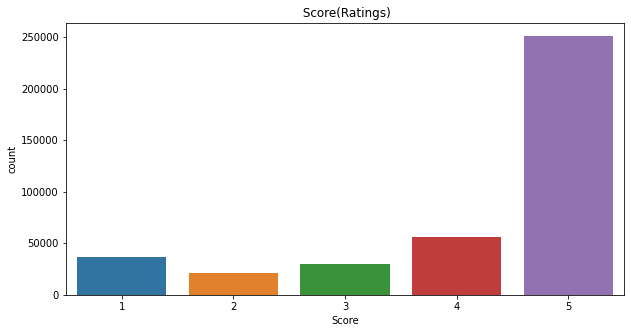

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Score',data=text)
plt.title(' Score(Ratings)')
plt.show()

In [ ]:
sentiment = []
for i in text['Score']:
    if i > 3:
        sentiment.append('positive')
    elif i < 3:
        sentiment.append('negative')
    else:
        sentiment.append('not')
        
text['sentiment'] = sentiment        

In [ ]:
text.head()

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,sentiment
0,0,B001E4KFG0,A3SGXH7AUHU8G,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,positive
1,1,B00813GRG4,A1D87F6ZCVE5N,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1.0,negative
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,positive
3,3,B000UA0QIQ,A395BORC6FGVX,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,negative
4,4,B006K2ZZ7K,A1UQRSCLF8GW1,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0,positive


In [ ]:
word_count = []
for i in text['ReviewText']:
    word_count.append(len(i.split()))
text['word_count'] = word_count    

In [ ]:
text.head()

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,sentiment,word_count
0,0,B001E4KFG0,A3SGXH7AUHU8G,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,positive,48
1,1,B00813GRG4,A1D87F6ZCVE5N,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1.0,negative,31
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,positive,94
3,3,B000UA0QIQ,A395BORC6FGVX,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,negative,41
4,4,B006K2ZZ7K,A1UQRSCLF8GW1,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0,positive,27


In [ ]:
pos = text[text['sentiment']=='positive']

In [ ]:
pos

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,sentiment,word_count
0,0,B001E4KFG0,A3SGXH7AUHU8G,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,positive,48
2,2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,positive,94
4,4,B006K2ZZ7K,A1UQRSCLF8GW1,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0,positive,27
5,5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1.0,positive,72
6,6,B006K2ZZ7K,A1SP2KVKFXXRU,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1.0,positive,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568448,568448,B001EO7N10,A1F6BHEYB7R6R,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...,1.0,positive,29
568449,568449,B001EO7N10,A28KG5XORO54A,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,1.0,positive,26
568451,568451,B004I613EE,A121AA1GQV751,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,positive,66
568452,568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,positive,35


## POPULAR WORDS IN POSITIVE REVIEWS

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


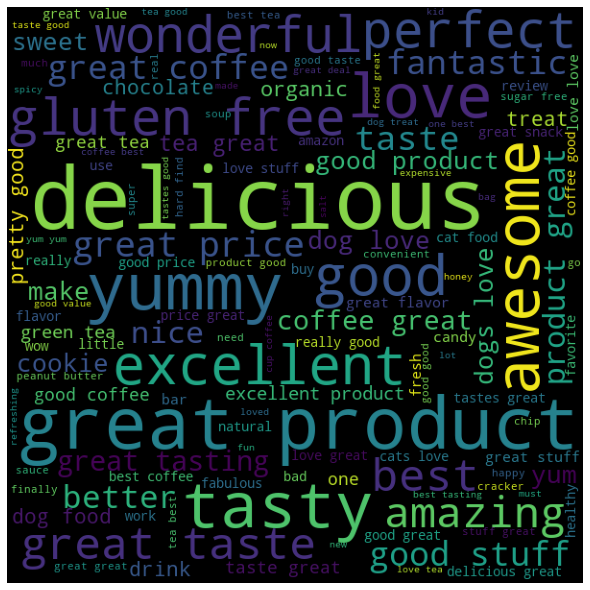

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in pos['ReviewSummary']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='Black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)    
    
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()     

## POPULAR NEGATIVE WORDS IN  REVIEWS(1-2RATINGS)


In [ ]:
neg = text[text['sentiment']=='negative']
neg

,ID,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,sentiment,word_count
1,1,B00813GRG4,A1D87F6ZCVE5N,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1.0,negative,31
3,3,B000UA0QIQ,A395BORC6FGVX,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,negative,41
12,12,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,1.0,negative,79
16,16,B001GVISJM,A3KLWF6WQ5BNY,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,1.0,negative,42
26,26,B001GVISJM,A3RXAU2N8KV45,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0.0,negative,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568433,568433,B003XUL27E,A1JUG9WCN1A52,maudlin666,0,0,1,1311638400,Tastes horrible!,I just bought this soup today at my local groc...,1.0,negative,227
568434,568434,B003XUL27E,ABGQPE97ZVYJ3,Katherine Kelly,0,0,2,1306368000,Not so good,This soup is mostly broth. Although it has a k...,1.0,negative,53
568435,568435,B003XUL27E,A2PSB4WQHH46H,carlyowu,0,2,2,1285718400,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu...",0.0,negative,60
568446,568446,B001EO7N10,A2P9W8T7NTLG2,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...,1.0,negative,52


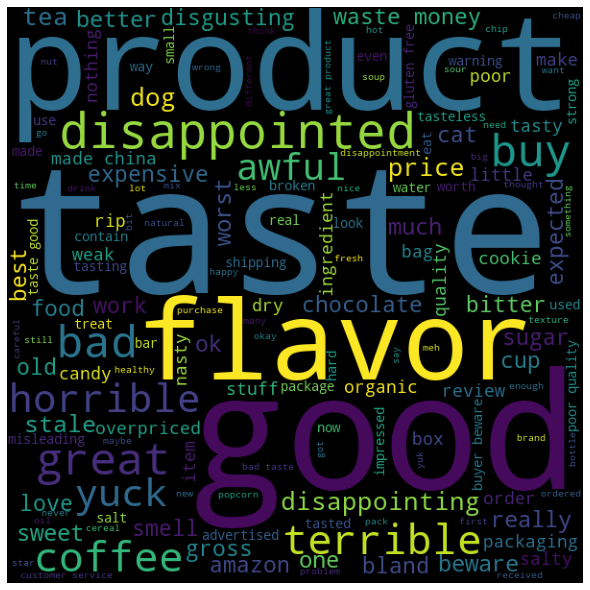

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in neg['ReviewSummary']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='Black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)    
    
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## RATING EFFECT HELPFULNESS

In [ ]:
usefulness = []
for i in text['Helpfulness']:
    if i > 0.75:
        usefulness.append(">75%")
    elif i < 0.25:
        usefulness.append("<25%")
    elif i >= 0.25 and i <= 0.75:
        usefulness.append("25-75%")
    else:
        usefulness.append("useless")
text['Helpfulness']  = usefulness      

In [ ]:
text['Helpfulness'].value_counts()

>75%      333167
25-75%     36504
<25%       24262
Name: Helpfulness, dtype: int64

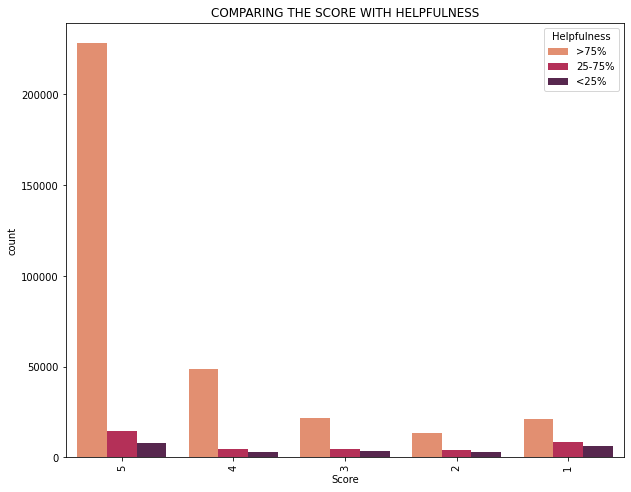

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Score',data=text,hue='Helpfulness',hue_order=['>75%','25-75%','<25%'],order=[5,4,3,2,1],palette="rocket_r")
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH HELPFULNESS')
plt.show()

## word  count by vary rating

In [ ]:
rating = text[text['Score']== 1].word_count.median()

In [ ]:
rating

61.0

In [ ]:
rating = text[text['Score']== 2].word_count.median()

In [ ]:
rating

67.0

In [ ]:
rating = text[text['Score']== 3].word_count.median()

In [ ]:
rating

70.0

In [ ]:
rating = text[text['Score']== 4].word_count.median()

In [ ]:
rating

65.0

In [ ]:
rating = text[text['Score']== 5].word_count.median()

In [ ]:
rating

52.0

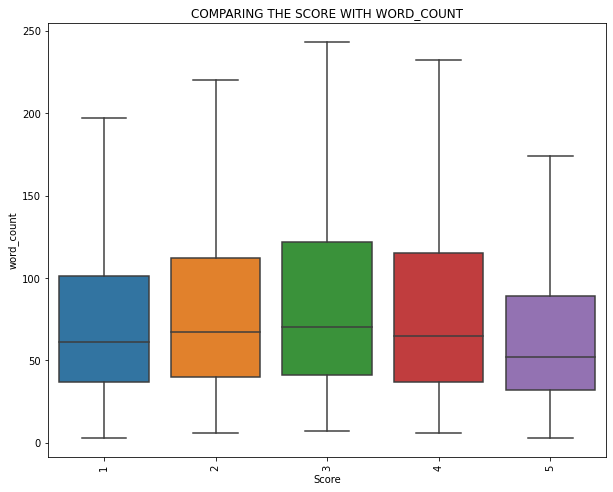

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Score',y='word_count',data=text,showfliers=False)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE SCORE WITH WORD_COUNT')
plt.show()

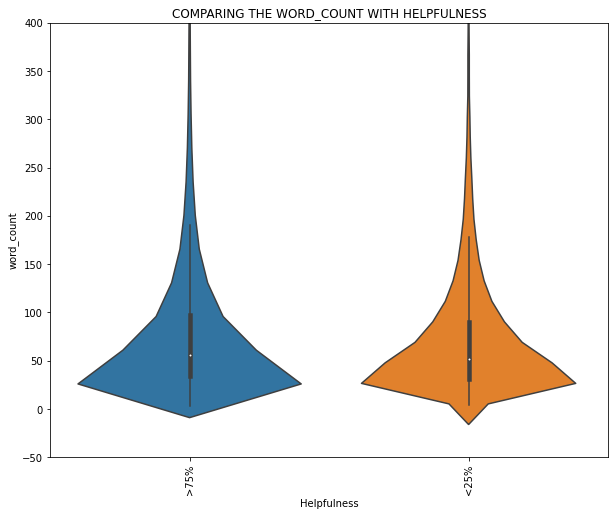

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Helpfulness',y='word_count',data=text,order=['>75%','<25%'])
plt.ylim(-50, 400)
plt.xticks(rotation=90,fontsize=10)
plt.title('COMPARING THE WORD_COUNT WITH HELPFULNESS')
plt.show()

In [ ]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [ ]:
from tqdm import tqdm, tqdm_notebook

In [ ]:
tqdm.pandas()

In [ ]:
temp_df = X_train['ReviewText'].progress_apply(lambda x: preprocess(x, 'lemmatize'))

temp_df.head()

100%|██████████| 315146/315146 [54:21<00:00, 96.61it/s]


,0,1
72048,well really join shower virtually join describ...,89
414504,like reviewer tried sauce costa rica fell love...,49
15363,disappointed received bonsai desert rose numbe...,188
282039,long color treated hair however since color ha...,126
2660,drink delicious tea almost every day yet find ...,11


In [ ]:
temp_df.columns = ['clean_text_lemmatize', 'text_length_lemmatize']

temp_df.head()


,clean_text_lemmatize,text_length_lemmatize
72048,well really join shower virtually join describ...,89
414504,like reviewer tried sauce costa rica fell love...,49
15363,disappointed received bonsai desert rose numbe...,188
282039,long color treated hair however since color ha...,126
2660,drink delicious tea almost every day yet find ...,11


In [ ]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,ReviewText,clean_text_stem,text_length_stem,clean_text_lemmatize,text_length_lemmatize
72048,Well don't REALLY join me in my shower - just ...,well really join shower virtually join describ...,89,well really join shower virtually join describ...,89
414504,"Like most of your reviewers, I tried this sauc...",like reviewer tried sauce costa rica fell love...,49,like reviewer tried sauce costa rica fell love...,49
15363,I was disappointed when I received this bonsai...,disappointed received bonsai desert rose numbe...,188,disappointed received bonsai desert rose numbe...,188
282039,"I'm in my 50's with very long, color treated h...",long color treated hair however since color ha...,126,long color treated hair however since color ha...,126
2660,I drink this delicious tea almost every day. ...,drink delicious tea almost every day yet find ...,11,drink delicious tea almost every day yet find ...,11


In [ ]:
X_train.drop(columns=['clean_text_stem','text_length_stem'],axis = 1,inplace = True)

In [ ]:
X_train.head()

,ReviewText,clean_text_lemmatize,text_length_lemmatize
72048,Well don't REALLY join me in my shower - just ...,well really join shower virtually join describ...,89
414504,"Like most of your reviewers, I tried this sauc...",like reviewer tried sauce costa rica fell love...,49
15363,I was disappointed when I received this bonsai...,disappointed received bonsai desert rose numbe...,188
282039,"I'm in my 50's with very long, color treated h...",long color treated hair however since color ha...,126
2660,I drink this delicious tea almost every day. ...,drink delicious tea almost every day yet find ...,11


Converting Text to Numerical vectors - BOW Representation
[link text](https://)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()
vocab.fit(X_train['clean_text_lemmatize'])

X_train_bow = vocab.transform(X_train['clean_text_lemmatize'])

In [ ]:
X_train_bow


<315146x91983 sparse matrix of type '<class 'numpy.int64'>'
	with 10373553 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 91983
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (315146, 91983)


In [ ]:
print(X_train_bow.toarray())
